LABORATORIO 02

LIBRERIAS

In [1]:
!pip install matplotlib
!pip install mahotas
!pip install cv
!pip install scikit-image
!pip install opencv-python

In [2]:
import numpy as np
import cv2 as cv2
import io as io
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpi
from PIL import Image
import mahotas
import mahotas.demos

1. FILTROS Y DETECTORES DE BORDES

1.1. Filtros de agregacion de ruido

(-0.5, 320.5, 480.5, -0.5)

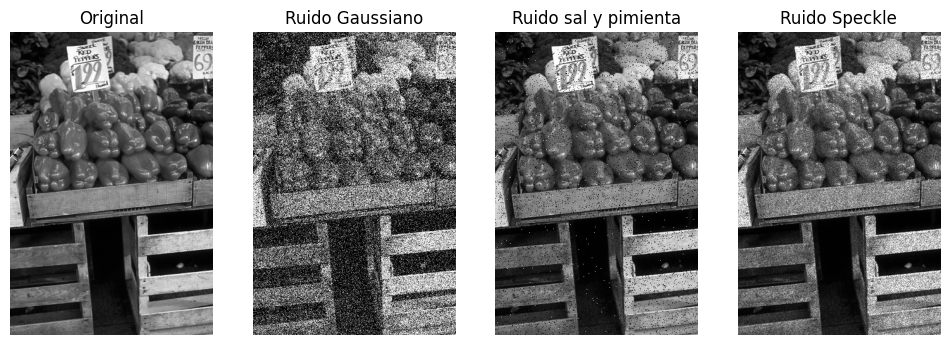

In [8]:
from skimage.util import random_noise

ruta="./Filtros/01.png"
gris = cv2.imread(ruta,0)
original=np.asarray(gris)

# Ruido gaussiano
gaussian_noise = random_noise(gris, mode='gaussian', var=0.08)
gaussian_image=np.uint8(gaussian_noise*255)

# Ruido sal y pimienta
sp_noise = random_noise(gris, mode='s&p', salt_vs_pepper=0.05)
sp_image=np.uint8(sp_noise*255)

# Ruido speckle
speckle_noise = random_noise(gris, mode='speckle', var=0.05)
speckle_image=np.uint8(speckle_noise*255)

plt.figure(figsize=(12,4))

plt.subplot(1,4,1)
plt.title("Original")
plt.imshow(gris,cmap=plt.cm.gray)
plt.axis("off")

plt.subplot(1,4,2)
plt.title("Ruido Gaussiano")
plt.imshow(gaussian_image,cmap=plt.cm.gray)
plt.axis("off")

plt.subplot(1,4,3)
plt.title("Ruido sal y pimienta")
plt.imshow(sp_image,cmap=plt.cm.gray)
plt.axis("off")

plt.subplot(1,4,4)
plt.title("Ruido Speckle")
plt.imshow(speckle_image,cmap=plt.cm.gray)
plt.axis("off")

1.2. Filtros de eliminacion de ruido

In [66]:
def denoised_paso_bajo(noisy_image):
    # Calcular la transformada de Fourier 2D
    f_transform = np.fft.fft2(noisy_image)
    f_shift = np.fft.fftshift(f_transform)

    # Crear un kernel para filtro paso-bajo (suavizado)
    f, c = noisy_image.shape
    center_f, center_c = f // 2, c // 2
    radius = 50  # Ajusta el tamaño del filtro
    mask = np.zeros((f, c), dtype=np.uint8)
    mask[center_f - radius:center_f + radius, center_c - radius:center_c + radius] = 1

    # Aplicar el filtro en el dominio de la frecuencia
    f_filtered = f_shift * mask

    # Calcular la transformada inversa
    denoised_image = np.abs(np.fft.ifft2(np.fft.ifftshift(f_filtered)))

    return denoised_image

def subplot_gray(row, col, ind, title, img):
    plt.subplot(row,col,ind)
    plt.title(title)
    if (len(img)!=0):
        plt.imshow(img, cmap=plt.cm.gray)
    plt.axis("off")


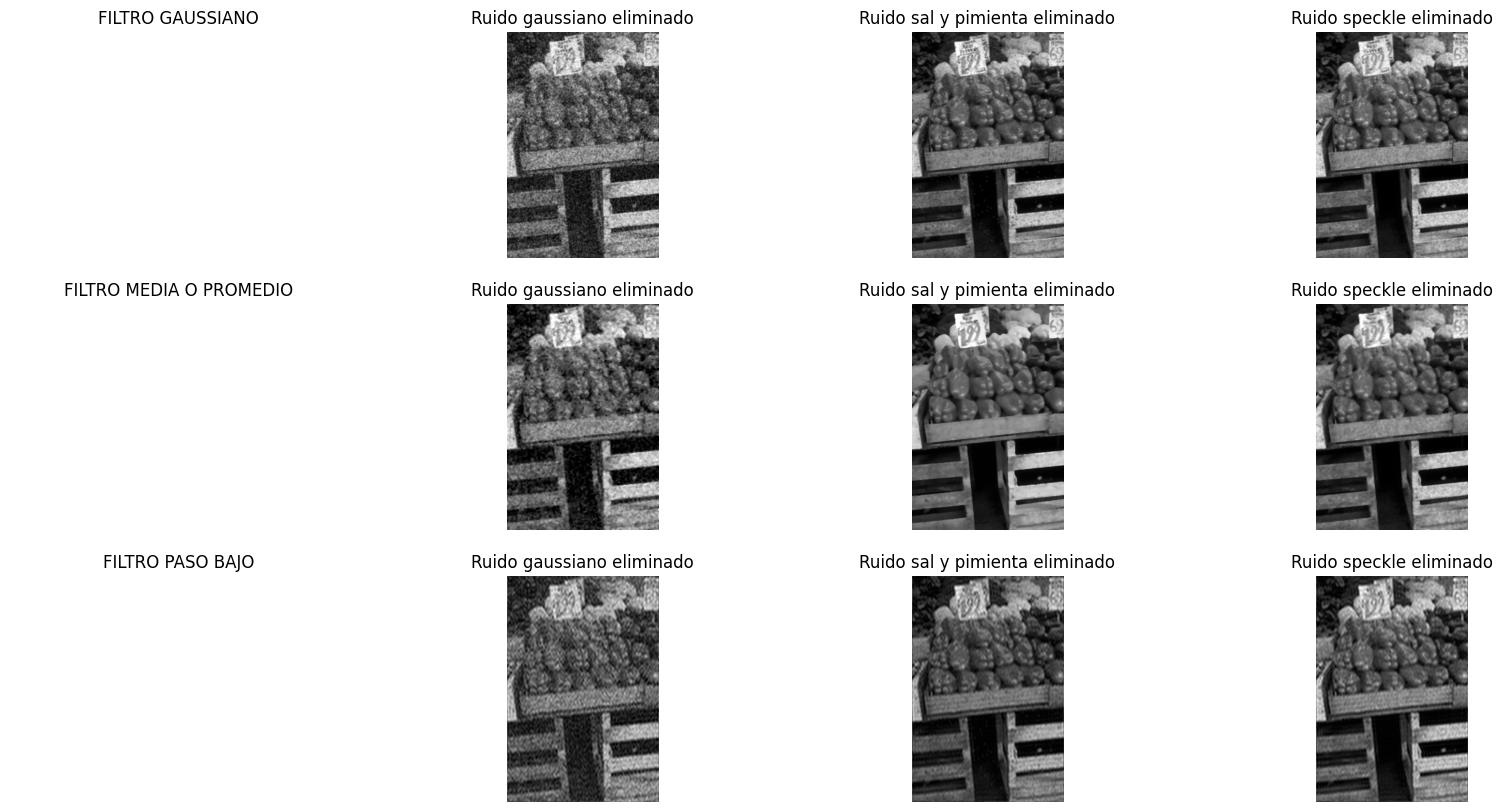

In [68]:
# Remover ruido por filtro gaussiano
denoised_gaussian1 = cv2.GaussianBlur(gaussian_image, (5, 5), 0)
denoised_gaussian2 = cv2.GaussianBlur(sp_image, (5, 5), 0)
denoised_gaussian3 = cv2.GaussianBlur(speckle_image, (5, 5), 0)

# Remover ruido por filtro media o promedo
denoised_median1 = cv2.medianBlur(gaussian_image, ksize=5)
denoised_median2 = cv2.medianBlur(sp_image, ksize=5)
denoised_median3 = cv2.medianBlur(speckle_image, ksize=5)

# Remover ruido por filtro paso bajo
denoised_paso_bajo1 = denoised_paso_bajo(gaussian_image)
denoised_paso_bajo2 = denoised_paso_bajo(sp_image)
denoised_paso_bajo3 = denoised_paso_bajo(speckle_image)

plt.figure(figsize=(20, 10))

# FILTRO GAUSIANO
subplot_gray(3, 4, 1, "FILTRO GAUSSIANO", [])
subplot_gray(3, 4, 2, "Ruido gaussiano eliminado", denoised_gaussian1)
subplot_gray(3, 4, 3, "Ruido sal y pimienta eliminado", denoised_gaussian2)
subplot_gray(3, 4, 4, "Ruido speckle eliminado", denoised_gaussian3)

# FILTRO MEDIA O PROMEDIO
subplot_gray(3, 4, 5, "FILTRO MEDIA O PROMEDIO", [])
subplot_gray(3, 4, 6, "Ruido gaussiano eliminado", denoised_median1)
subplot_gray(3, 4, 7, "Ruido sal y pimienta eliminado", denoised_median2)
subplot_gray(3, 4, 8, "Ruido speckle eliminado", denoised_median3)

# FILTRO PASO BAJO
subplot_gray(3, 4, 9, "FILTRO PASO BAJO", [])
subplot_gray(3, 4, 10, "Ruido gaussiano eliminado", denoised_paso_bajo1)
subplot_gray(3, 4, 11, "Ruido sal y pimienta eliminado", denoised_paso_bajo2)
subplot_gray(3, 4, 12, "Ruido speckle eliminado", denoised_paso_bajo3)

# plt.subplot(3,4,2)
# plt.title("Ruido gaussiano eliminado")
# plt.imshow(denoised_gaussian1 ,cmap=plt.cm.gray)
# plt.axis("off")

# plt.subplot(3,4,3)
# plt.title("Ruido sal y pimienta eliminado")
# plt.imshow(denoised_gaussian2 ,cmap=plt.cm.gray)
# plt.axis("off")

# plt.subplot(3,4,4)
# plt.title("Ruido speckle eliminado")
# plt.imshow(denoised_gaussian3 ,cmap=plt.cm.gray)
# plt.axis("off")

# FILTRO MEDIA O PROMEDIO
# plt.subplot(3,4,5)
# plt.title("FILTRO MEDIA O PROMEDIO")
# plt.axis("off")

# plt.subplot(3,4,6)
# plt.title("Ruido gaussiano eliminado")
# plt.imshow(denoised_median1 ,cmap=plt.cm.gray)
# plt.axis("off")

# plt.subplot(3,4,7)
# plt.title("Ruido sal y pimienta eliminado")
# plt.imshow(denoised_median2 ,cmap=plt.cm.gray)
# plt.axis("off")

# plt.subplot(3,4,8)
# plt.title("Ruido speckle eliminado")
# plt.imshow(denoised_median3 ,cmap=plt.cm.gray)
# plt.axis("off")

# # FILTRO PASO BAJO
# plt.subplot(3,4,9)
# plt.title("FILTRO PASO BAJO")
# plt.axis("off")

# plt.subplot(3,4,10)
# plt.title("Ruido gaussiano eliminado")
# plt.imshow(denoised_paso_bajo1 ,cmap=plt.cm.gray)
# plt.axis("off")

# plt.subplot(3,4,11)
# plt.title("Ruido sal y pimienta eliminado")
# plt.imshow(denoised_paso_bajo2 ,cmap=plt.cm.gray)
# plt.axis("off")

# plt.subplot(3,4,12)
# plt.title("Ruido speckle eliminado")
# plt.imshow(denoised_paso_bajo3 ,cmap=plt.cm.gray)
# plt.axis("off")

1.3. Filtros de obtencion de bordes

In [75]:
from skimage import filters

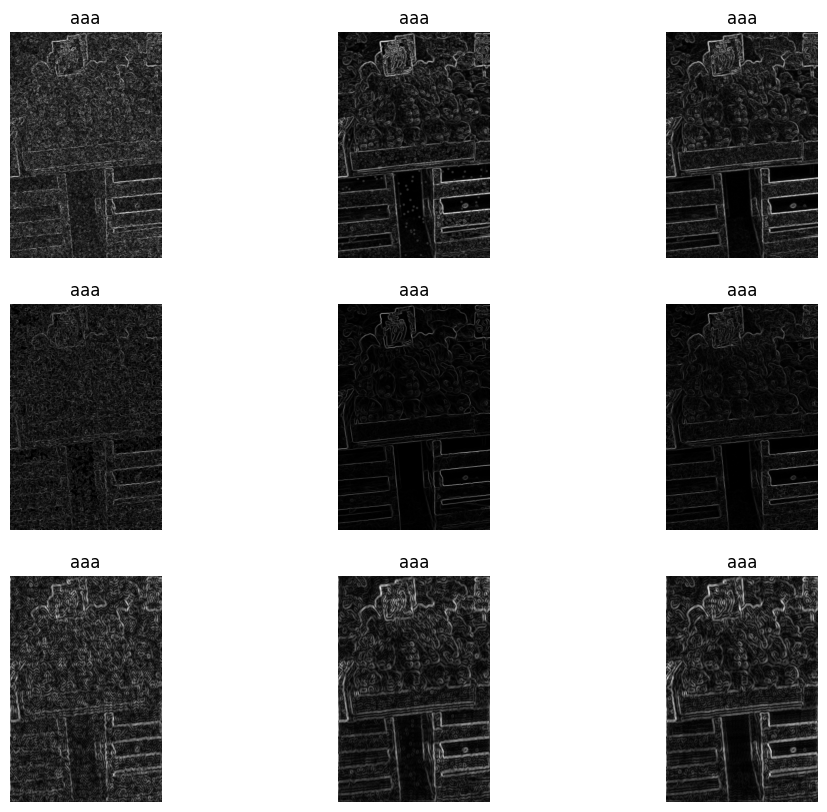

In [85]:
# Roberts
images=[]
images.append(filters.roberts(denoised_gaussian1))
images.append(filters.roberts(denoised_gaussian2))
images.append(filters.roberts(denoised_gaussian3))

images.append(filters.roberts(denoised_median1))
images.append(filters.roberts(denoised_median2))
images.append(filters.roberts(denoised_median3))

images.append(filters.roberts(denoised_paso_bajo1))
images.append(filters.roberts(denoised_paso_bajo2))
images.append(filters.roberts(denoised_paso_bajo3))

plt.figure(figsize=(12, 10))
row=3
col=3
tot=len(images)
for i in range(0, tot):
    subplot_gray(row, col, i+1, "aaa", images[i])

In [ ]:
# Prewitt

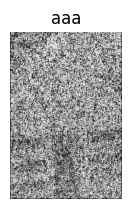

In [73]:
# Sobel
sobel1=cv2.Sobel(src=denoised_gaussian1, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
filtered_img=cv2.convertScaleAbs(sobel1)

plt.figure(figsize=(12, 10))
subplot_gray(4,1,1,"aaa",filtered_img)

In [ ]:
# Laplaciano
laplacian=np.uint8(np.abs((cv2.Laplacian(gris, cv2.CV_64F))))

In [ ]:
# Laplaciano gaussiana

In [ ]:
# Canny
canny= np.uint8(cv2.Canny(gris, 100, 200))

2. MORFOLOGIA MATEMATICA

3. SEGMENTACION

4. VIDEO